# OC_P3 Nettoyage et Analyse des données

Bienvenue dans le notebook de nettoyage du projet "Anticipez les besoins en consommation de bâtiments".

# Sommaire
- <a href="#C1">I. Nettoyage des données</a>
    - 1. Importation des librairies
    - 2. Paramétrages DataViz
    - 3. Chargement et affichage du dataframe
    - 4. Gestions des valeurs manquantes et doublons
    - 5. Suppression des outliers
    - 6. Vérifications et sauvegarde du dataset cleané
    <br></br>
- <a href="#C2">II. Exploration des données</a>
    - 1. Matrice des corrélations
    - 2. Analyse Quanti/Quanti
    - 3. Analyse Quanti/Quali
    - 4. Analyse en Composantes Principales (ACP)

# <a name="C1">I. Nettoyage des données</a>

<font size="5">1. Importation des librairies</font>

In [2]:
# importation des librairies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<font size="5">2. Paramétrages Dataviz</font>

In [3]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font_scale=1, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

# set dark background
plt.style.use("dark_background")

<font size="5">3. Chargement et affichage du dataframe</font>

In [4]:
# chargement du dataframe
df = pd.read_csv('C:/Users/omira/Desktop/Anticipate-Energy-Needs/2016_Building_Energy_Benchmarking.csv')
# afficher toutes les colonnes ainsi que la forme
pd.set_option('display.max_columns', None)
df.shape

(3376, 46)

In [13]:
# affichage + taille du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
# describe
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


<font size="5">4. Vérification des doublons et valeurs manquantes</font>

In [7]:
# check des doublons
df.loc[df.duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [8]:
# check des valeurs manquantes
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [5]:
df_subset = df[["BuildingType","PrimaryPropertyType","YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions", 'Electricity(kBtu)', 'NaturalGas(kBtu)']]

In [10]:
df_subset.dtypes

BuildingType            object
PrimaryPropertyType     object
YearBuilt                int64
NumberofBuildings      float64
NumberofFloors           int64
PropertyGFATotal         int64
ENERGYSTARScore        float64
SiteEUI(kBtu/sf)       float64
SiteEnergyUse(kBtu)    float64
Electricity(kWh)       float64
NaturalGas(therms)     float64
TotalGHGEmissions      float64
dtype: object

In [6]:
df_subset.isnull().sum()

BuildingType             0
PrimaryPropertyType      0
YearBuilt                0
NumberofBuildings        8
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        843
SiteEUI(kBtu/sf)         7
SiteEnergyUse(kBtu)      5
Electricity(kWh)         9
NaturalGas(therms)       9
TotalGHGEmissions        9
Electricity(kBtu)        9
NaturalGas(kBtu)         9
dtype: int64

In [7]:
# le subset sans données manquantes
df_subset_one = df[["BuildingType","PrimaryPropertyType","YearBuilt","NumberofFloors","PropertyGFATotal"]]

# le subset avec les données manquantes
df_subset_two = df[["NumberofBuildings","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions","ENERGYSTARScore",'Electricity(kBtu)', 'NaturalGas(kBtu)']]

In [8]:
# remplacement des valeurs manquantes avec l'algorithme KNNImputer
imputer = KNNImputer(n_neighbors=8)
imputed_df = pd.DataFrame(imputer.fit_transform(df_subset_two), columns=df_subset_two.columns)

In [35]:
# fusion des 2 subsets
df_clean = pd.concat([df_subset_one,imputed_df], axis=1)

In [29]:
df_clean.shape

(3376, 14)

<font size="5">5. Suppressions des outliers</font>

findfont: Font family ['Optima'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Optima'] not found. Falling back to DejaVu Sans.


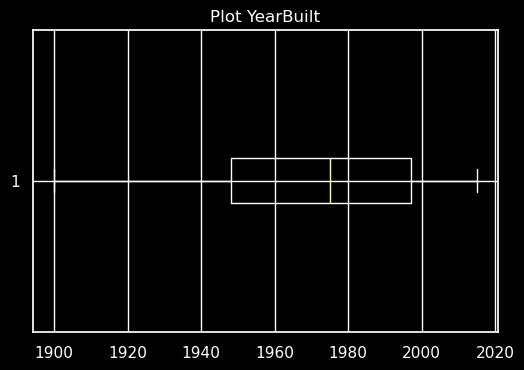

YearBuilt


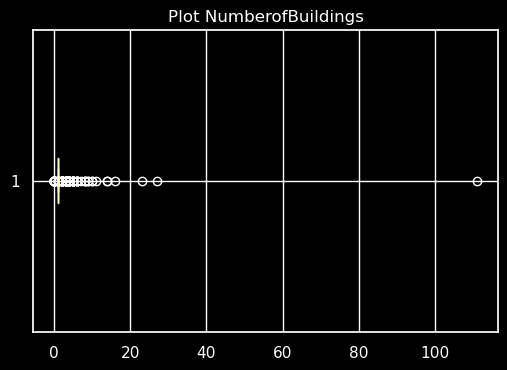

NumberofBuildings


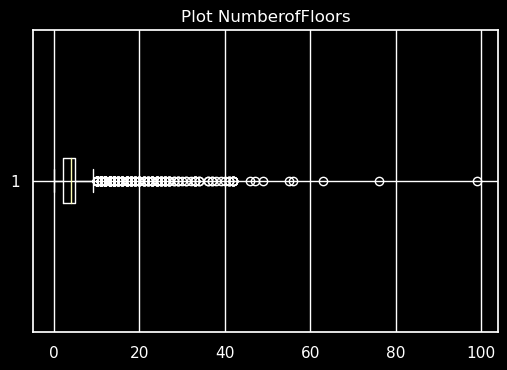

NumberofFloors


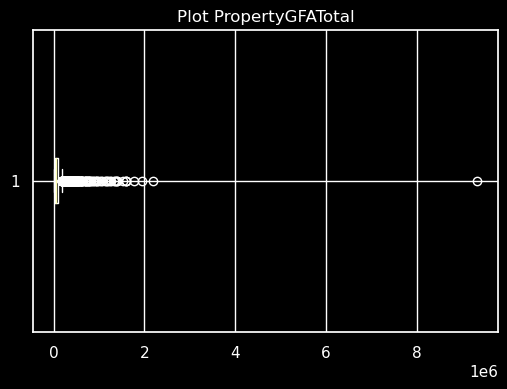

PropertyGFATotal


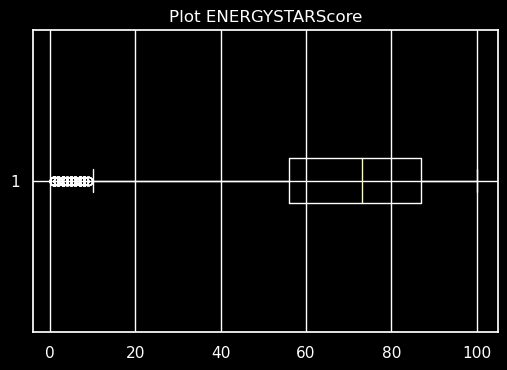

ENERGYSTARScore


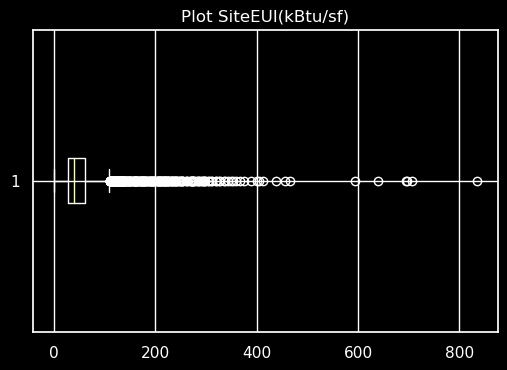

SiteEUI(kBtu/sf)


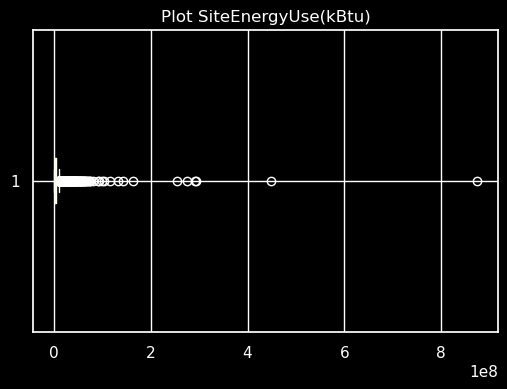

SiteEnergyUse(kBtu)


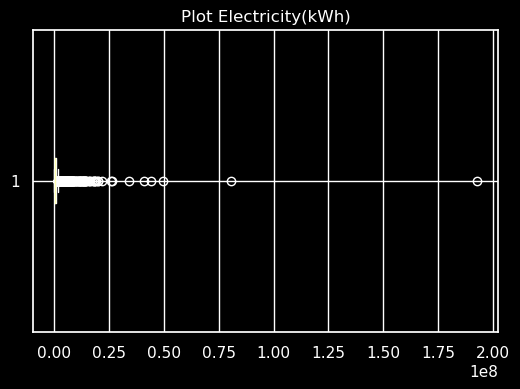

Electricity(kWh)


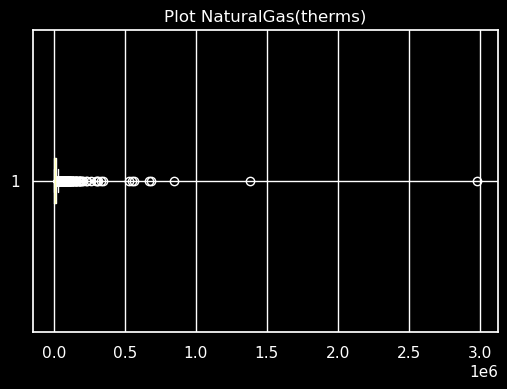

NaturalGas(therms)


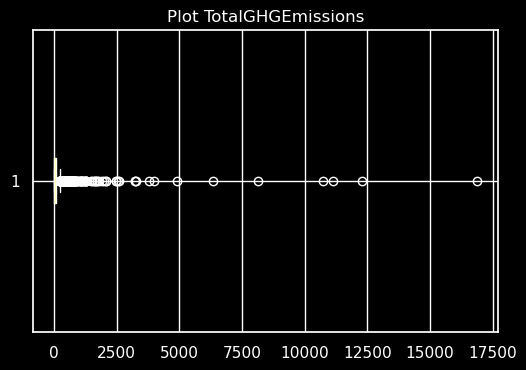

TotalGHGEmissions


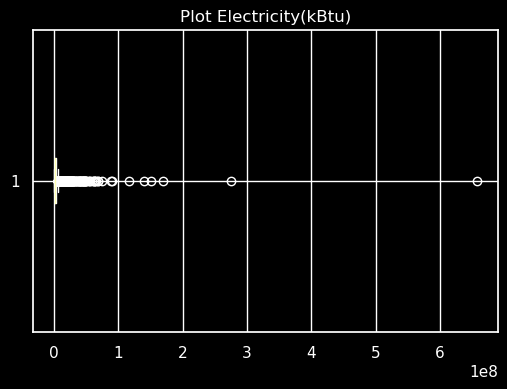

Electricity(kBtu)


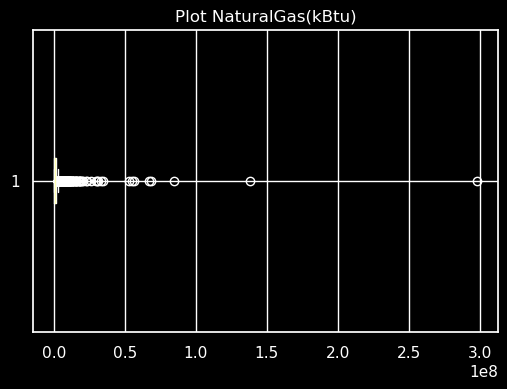

NaturalGas(kBtu)


In [11]:
# on vérifie les outliers
list_columns = ["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions", 'Electricity(kBtu)', 'NaturalGas(kBtu)']

for columns_name in list_columns:
    plt.title(f"Plot {columns_name}")
    plt.boxplot(df_clean[columns_name], vert=False)
    plt.show()
    print(columns_name)

In [36]:
#suppression des outliers
df_clean = df_clean[df_clean['NumberofBuildings'] <= 40]
df_clean = df_clean[df_clean['NumberofFloors'] <= 80]
df_clean = df_clean[df_clean['PropertyGFATotal'] <= 1800000]
df_clean = df_clean[df_clean['SiteEUI(kBtu/sf)'] <= 450]
df_clean = df_clean[df_clean['SiteEnergyUse(kBtu)'] <= 80000000]
df_clean = df_clean[df_clean['Electricity(kWh)'] <= 20000000]
df_clean = df_clean[df_clean['NaturalGas(therms)'] <= 200000]
df_clean = df_clean[df_clean['TotalGHGEmissions'] <= 1900]
df_clean = df_clean[df_clean['Electricity(kBtu)'] <= 30000000]
df_clean = df_clean[df_clean['NaturalGas(kBtu)'] <= 16000000]

In [37]:
df_clean.shape

(3304, 14)

<font size="5">6. Vérifications et sauvegarde du dataset cleané</font>

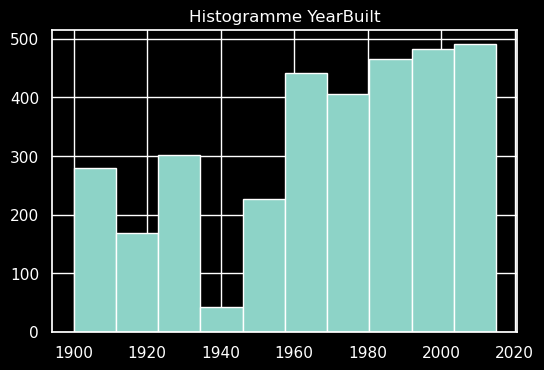

YearBuilt


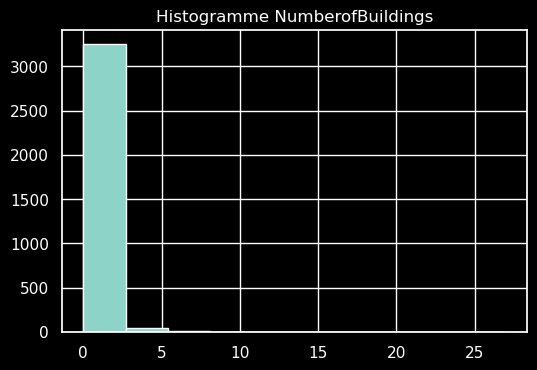

NumberofBuildings


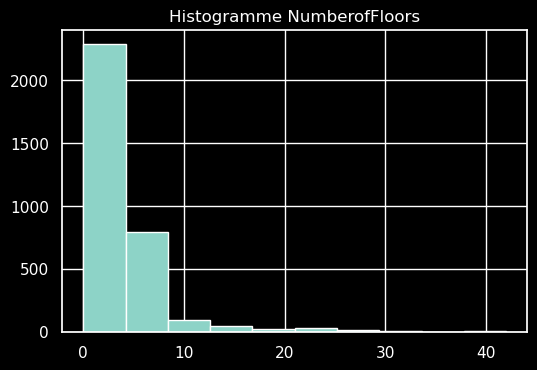

NumberofFloors


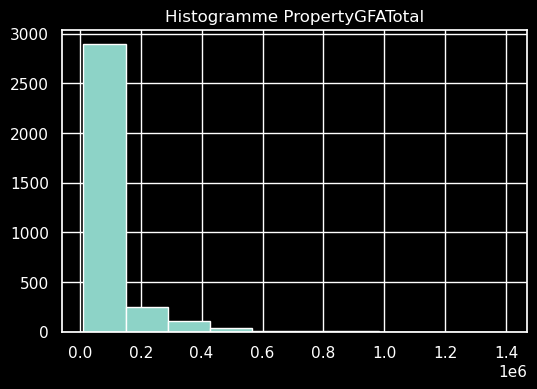

PropertyGFATotal


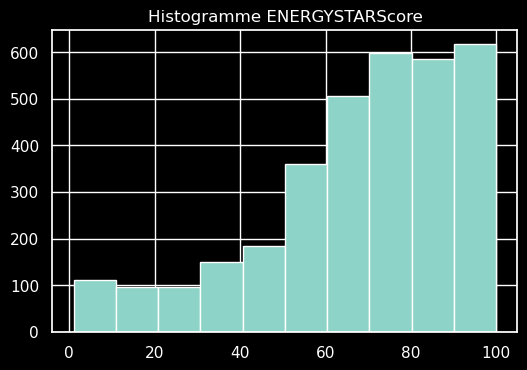

ENERGYSTARScore


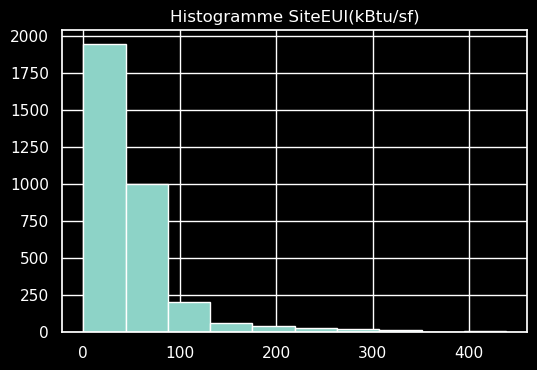

SiteEUI(kBtu/sf)


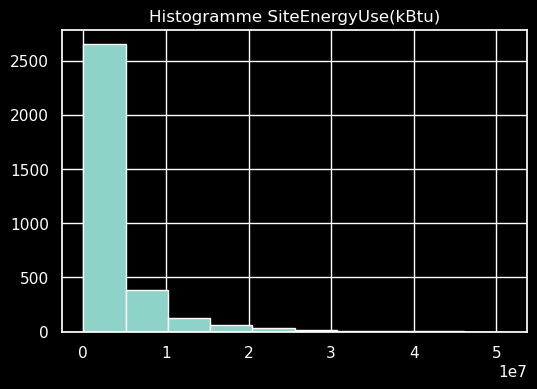

SiteEnergyUse(kBtu)


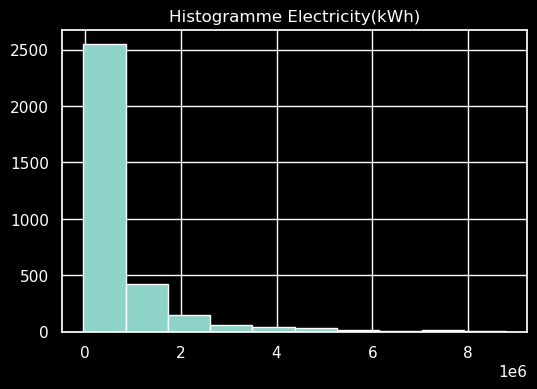

Electricity(kWh)


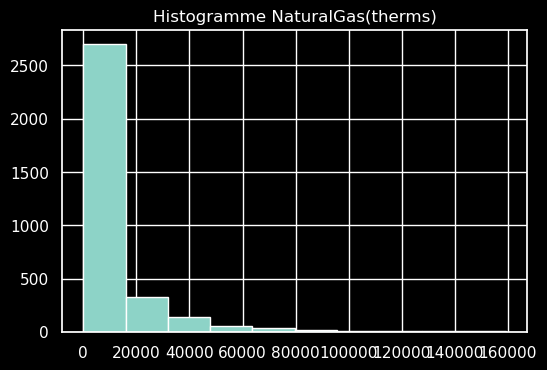

NaturalGas(therms)


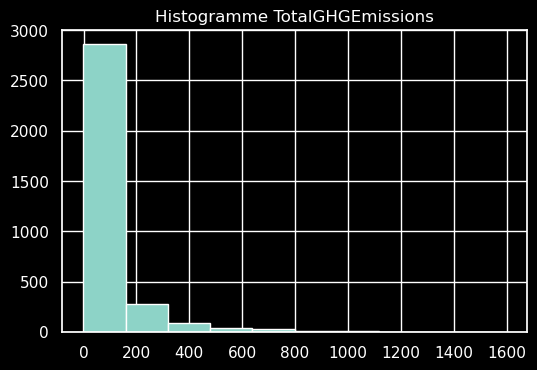

TotalGHGEmissions


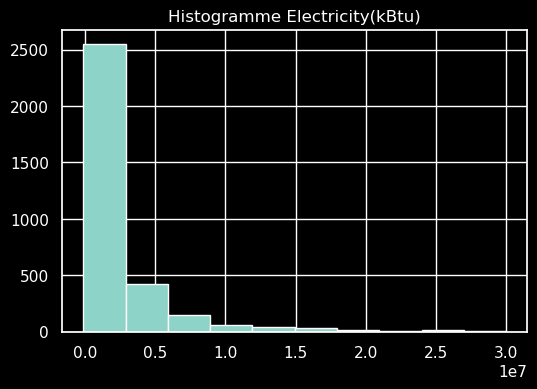

Electricity(kBtu)


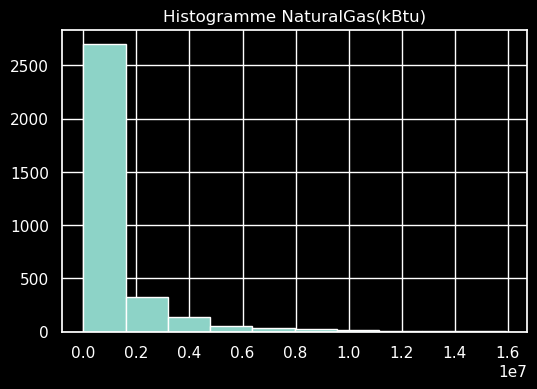

NaturalGas(kBtu)


In [38]:
# on vérifie que la distribution des variables est correcte
list_columns = ["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions",'Electricity(kBtu)', 'NaturalGas(kBtu)']

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.hist(df_clean[columns_name])
    plt.show()
    print(columns_name)

In [39]:
df_clean.shape

(3304, 14)

In [40]:
df_clean.isnull().sum()

BuildingType           0
PrimaryPropertyType    0
YearBuilt              0
NumberofFloors         0
PropertyGFATotal       0
NumberofBuildings      0
SiteEUI(kBtu/sf)       0
SiteEnergyUse(kBtu)    0
Electricity(kWh)       0
NaturalGas(therms)     0
TotalGHGEmissions      0
ENERGYSTARScore        0
Electricity(kBtu)      0
NaturalGas(kBtu)       0
dtype: int64

In [41]:
df_clean.to_csv('buildings_cleaned.csv', index=False)

# <a name="C2">II. Exploration des données</a>

<font size="5">1. Matrice des corrélations</font>

findfont: Font family ['Optima'] not found. Falling back to DejaVu Sans.


<AxesSubplot:title={'center':'Matrice des correlations'}>

findfont: Font family ['Optima'] not found. Falling back to DejaVu Sans.


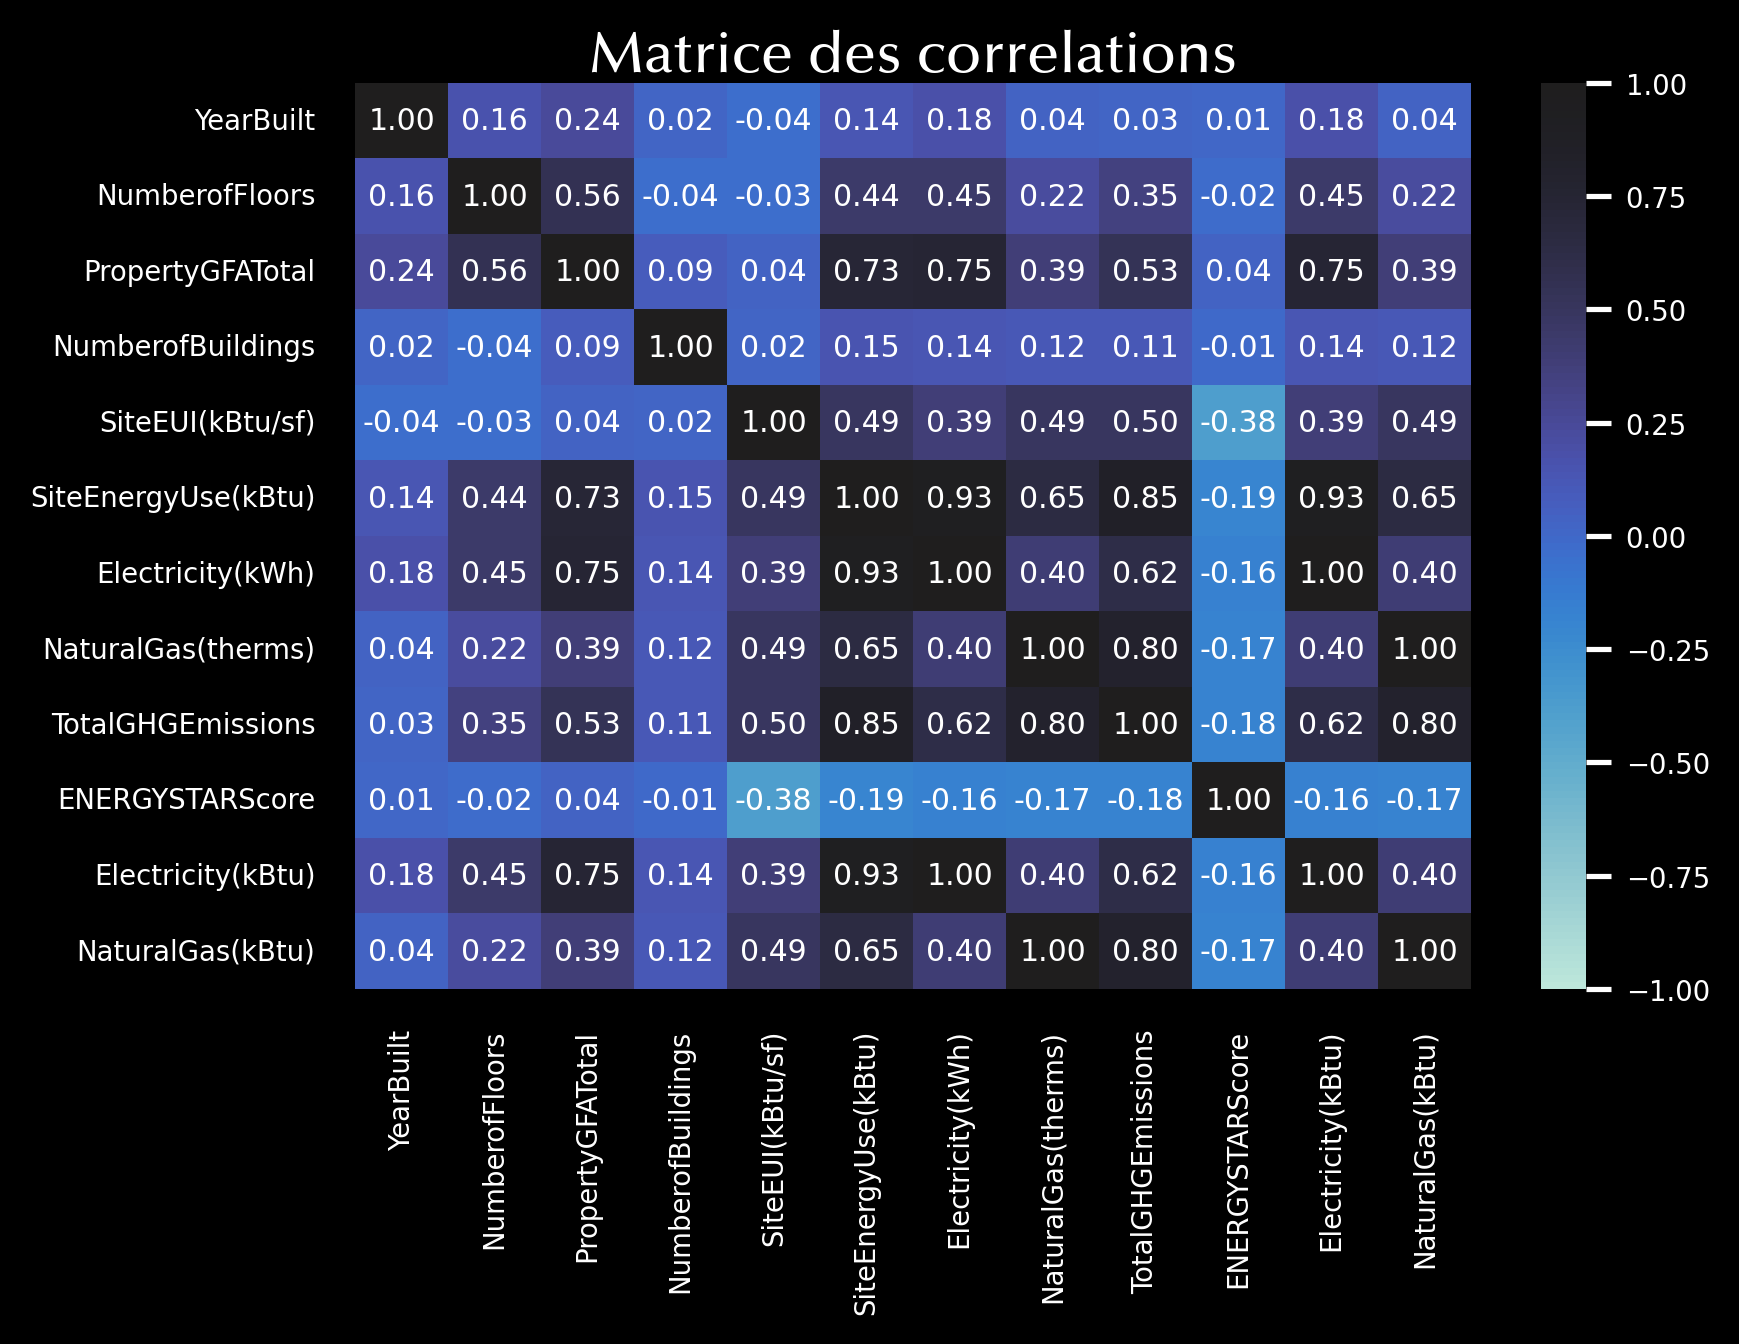

In [44]:
df_matrix = df_clean[["YearBuilt","NumberofFloors","PropertyGFATotal","NumberofBuildings","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions","ENERGYSTARScore",'Electricity(kBtu)', 'NaturalGas(kBtu)']]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

sns.set(font=prop.get_name(), font_scale=0.6)
plt.style.use("dark_background")
plt.title("Matrice des correlations", fontproperties=prop, **text_kwargs)
sns.heatmap(df_matrix.corr(), center=1, annot=True, fmt=".2f",vmin=-1, vmax=1)

<font size="5">2. Analyse Quanti/Quanti</font>

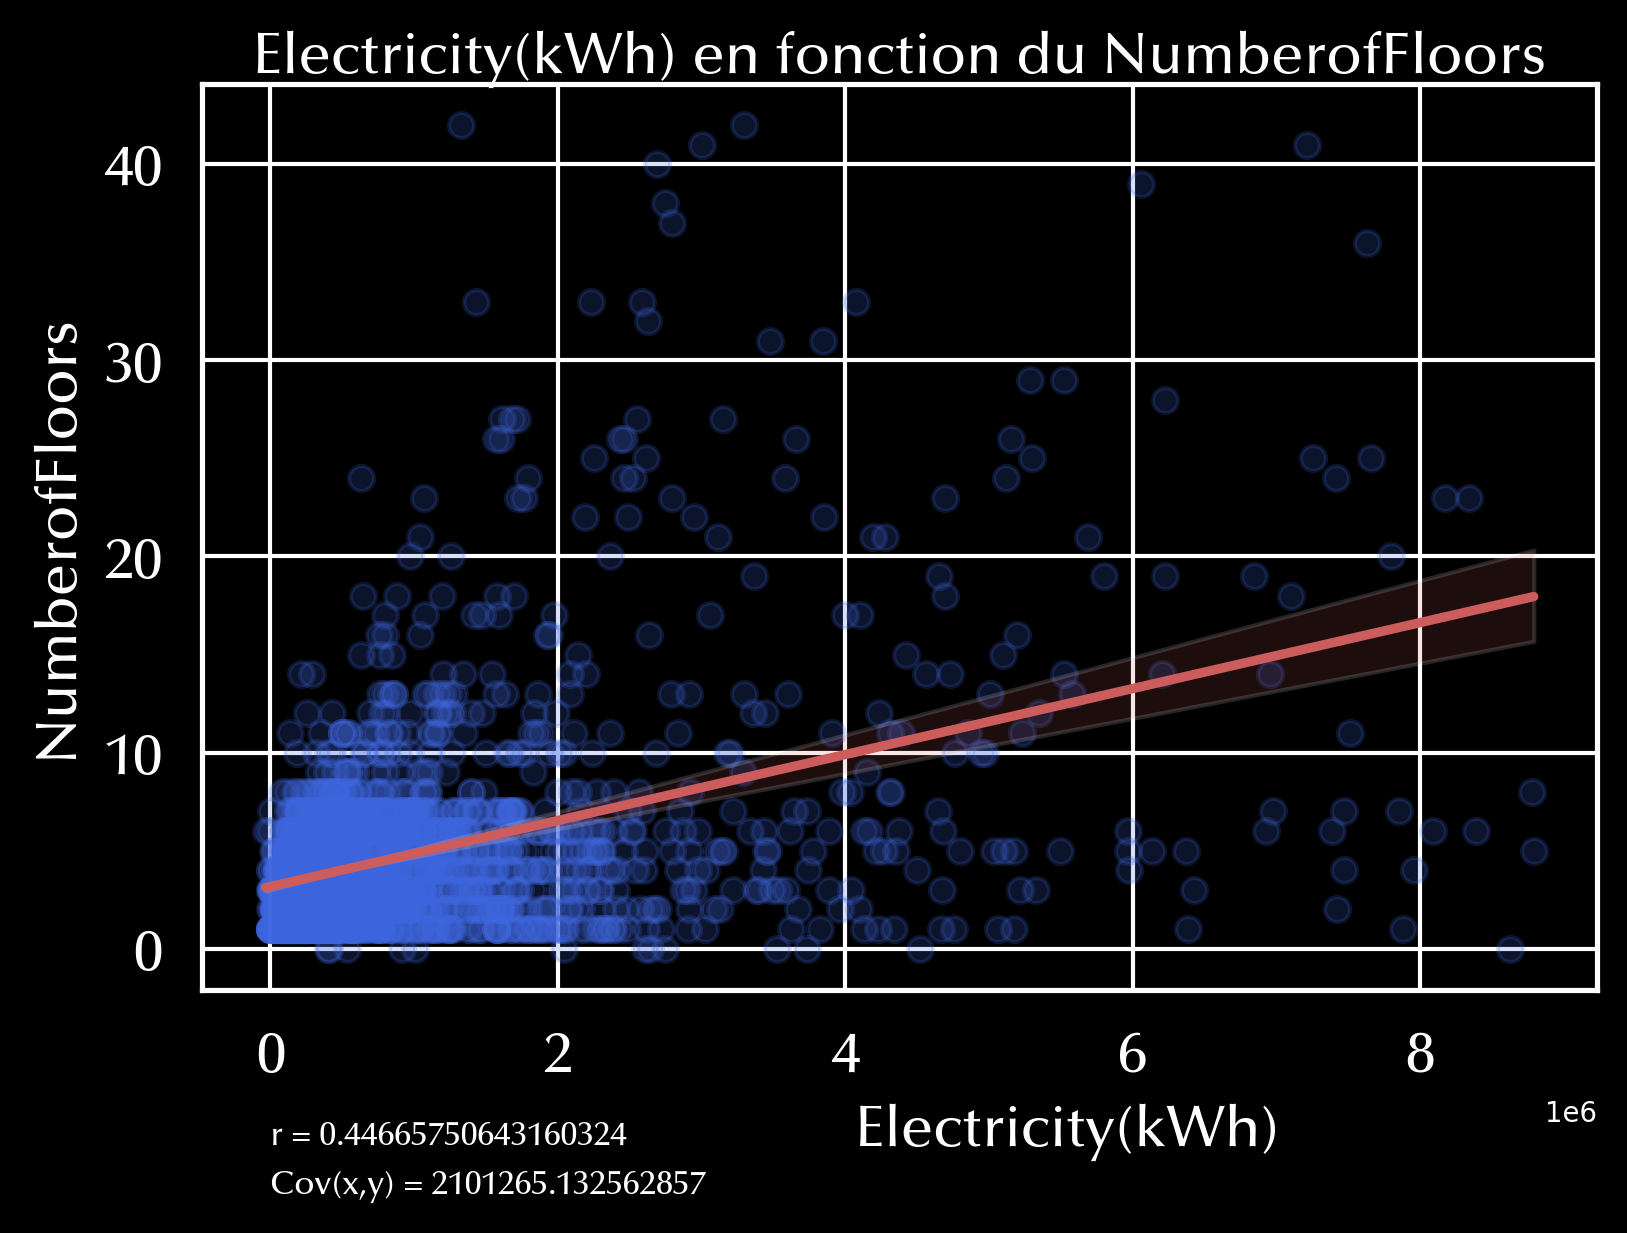

In [57]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df_clean["Electricity(kWh)"],df_clean["NumberofFloors"])[0]
# même chose pour la covariance
cov_value = np.cov(df_clean["Electricity(kWh)"],df_clean["NumberofFloors"],ddof=0)[1,0]


#customisation du graph
plt.style.use("dark_background")
plt.title("Electricity(kWh) en fonction du NumberofFloors", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="Electricity(kWh)", y="NumberofFloors", data=df_clean, color='royalblue',line_kws={"color":"indianred"},scatter_kws={"alpha":0.2,"edgecolor":"royalblue"}, marker='o')
plt.xlabel("                       Electricity(kWh)", fontproperties=prop, size = 14)
plt.ylabel("NumberofFloors", fontproperties=prop, size = 14)
plt.text(1, -10, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(2, -12.5, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

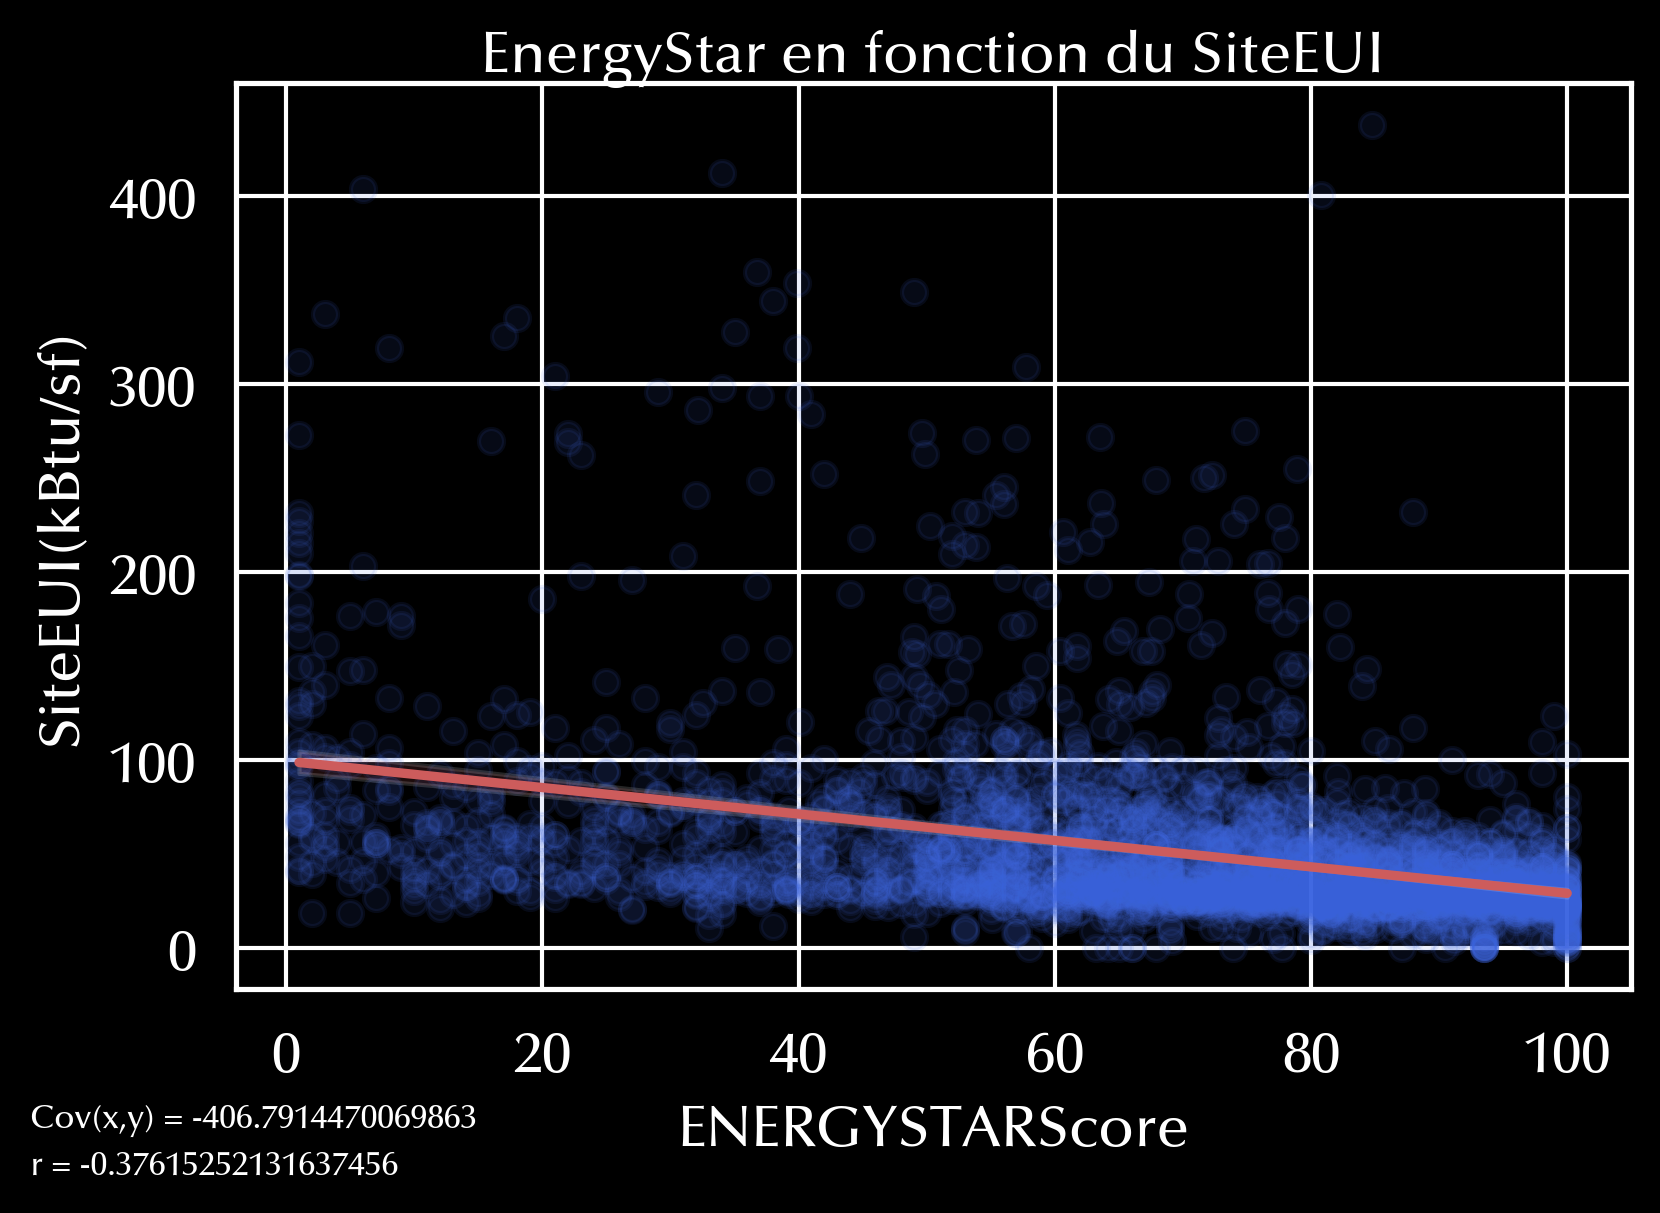

In [52]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df_clean["ENERGYSTARScore"],df_clean["SiteEUI(kBtu/sf)"])[0]
# même chose pour la covariance
cov_value = np.cov(df_clean["ENERGYSTARScore"],df_clean["SiteEUI(kBtu/sf)"],ddof=0)[1,0]


#customisation du graph
plt.style.use("dark_background")
plt.title("EnergyStar en fonction du SiteEUI", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="ENERGYSTARScore", y="SiteEUI(kBtu/sf)", data=df_clean, color='royalblue',line_kws={"color":"indianred"},scatter_kws={"alpha":0.1,"edgecolor":"royalblue"}, marker='o')
plt.xlabel("ENERGYSTARScore", fontproperties=prop, size = 14)
plt.ylabel("SiteEUI(kBtu/sf)", fontproperties=prop, size = 14)
plt.text(-20, -120, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(-20, -95, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

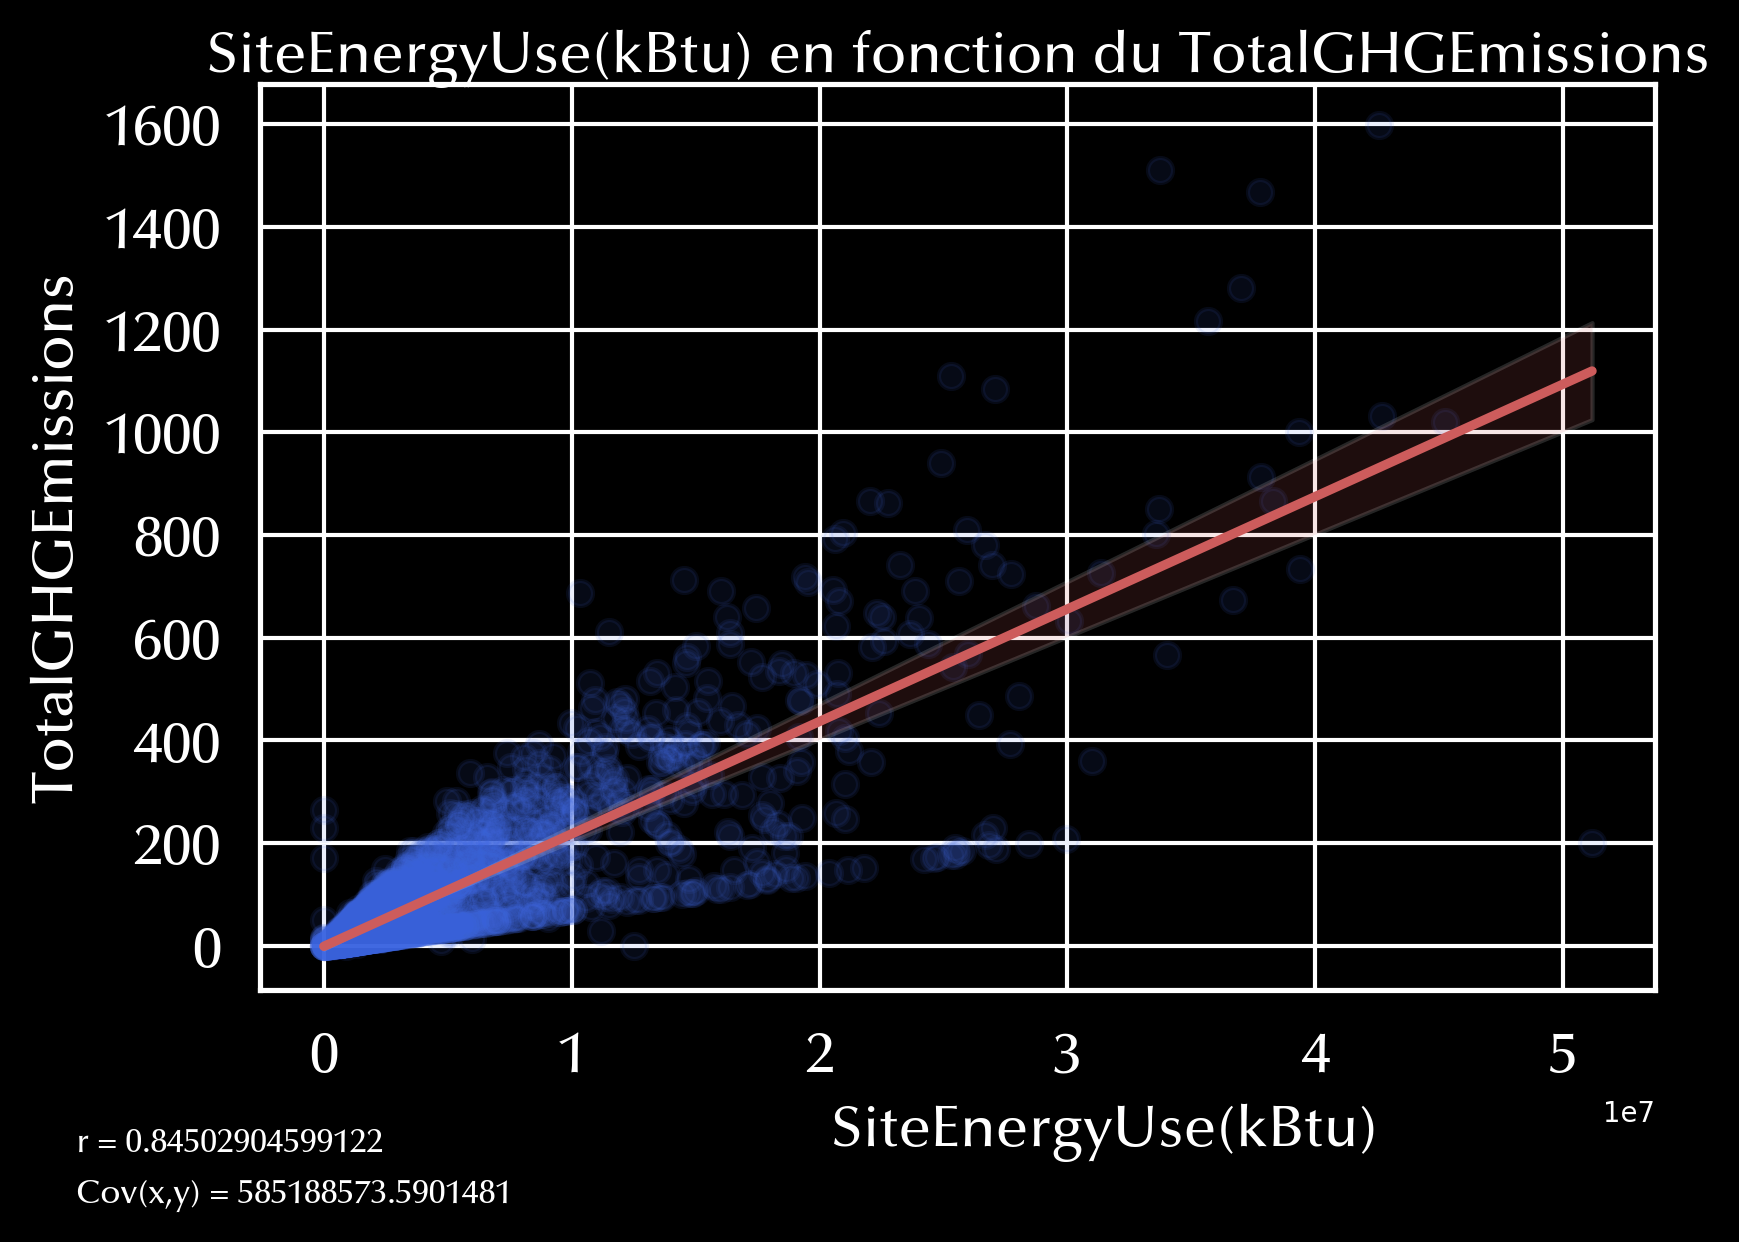

In [66]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df_clean["SiteEnergyUse(kBtu)"],df_clean["TotalGHGEmissions"])[0]
# même chose pour la covariance
cov_value = np.cov(df_clean["SiteEnergyUse(kBtu)"],df_clean["TotalGHGEmissions"],ddof=0)[1,0]


#customisation du graph
plt.style.use("dark_background")
plt.title("SiteEnergyUse(kBtu) en fonction du TotalGHGEmissions", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="SiteEnergyUse(kBtu)", y="TotalGHGEmissions", data=df_clean, color='royalblue',line_kws={"color":"indianred"},scatter_kws={"alpha":0.1,"edgecolor":"royalblue"}, marker='o')
plt.xlabel("                    SiteEnergyUse(kBtu)", fontproperties=prop, size = 14)
plt.ylabel("TotalGHGEmissions", fontproperties=prop, size = 14)
plt.text(-10000000, -400, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(-10000000, -500, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

<font size="5">3. Analyse Quanti/Quali</font>

In [67]:
def anova(data, variable_qualitative):
    # liste des variables quantitatives
    variables_quantitatives = list(data.select_dtypes(include=['float64', 'int64']).columns)

    # dictionnaire pour stocker les résultats de l'ANOVA pour chaque variable quantitative
    anova_results = {}

    # boucle pour effectuer l'ANOVA pour chaque variable quantitative
    for var in variables_quantitatives:
        # diviser les données en groupes en fonction de la variable qualitative
        groupes = [data[data[variable_qualitative] == g][var] for g in data[variable_qualitative].unique()]

        # effectuer l'ANOVA
        resultat_anova = f_oneway(*groupes)

        # stocker les résultats dans le dictionnaire
        anova_results[var] = {"statistique": resultat_anova.statistic, "p_value": resultat_anova.pvalue}

    # retourner le dictionnaire avec les résultats de l'ANOVA
    return anova_results

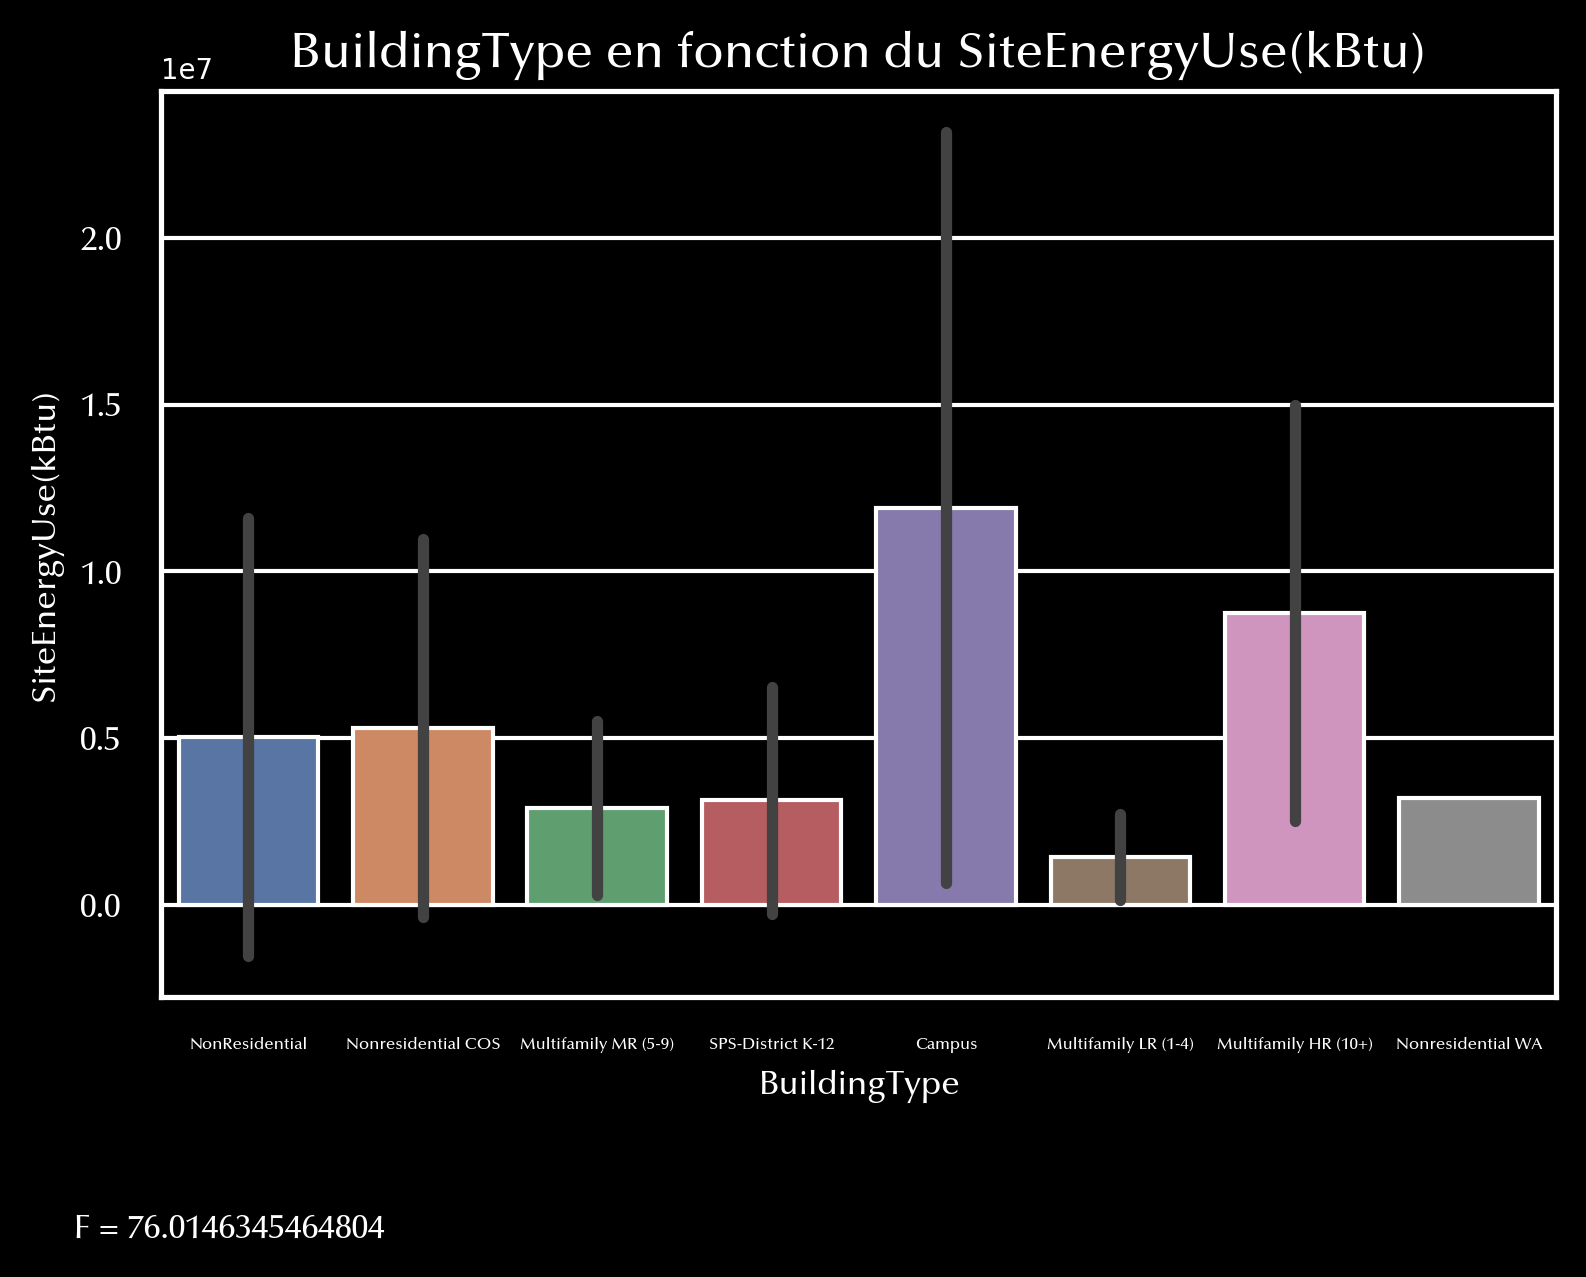

In [68]:
resultats_anova = anova(df_clean, "BuildingType")
sns.barplot(x='BuildingType', y='SiteEnergyUse(kBtu)', data=df_clean, ci='sd', palette="deep")
plt.title('BuildingType en fonction du SiteEnergyUse(kBtu)', fontproperties=prop, size = 12)
plt.xlabel("BuildingType", fontproperties=prop, size = 8)
plt.ylabel("SiteEnergyUse(kBtu)", fontproperties=prop, size = 8)
plt.xticks(fontsize=4, fontproperties=prop)
plt.yticks(fontsize=8, fontproperties=prop)
plt.text(-1, -10000000, 'F = {}'.format(resultats_anova['SiteEnergyUse(kBtu)']["statistique"]), fontproperties=prop, size=8)
plt.show()

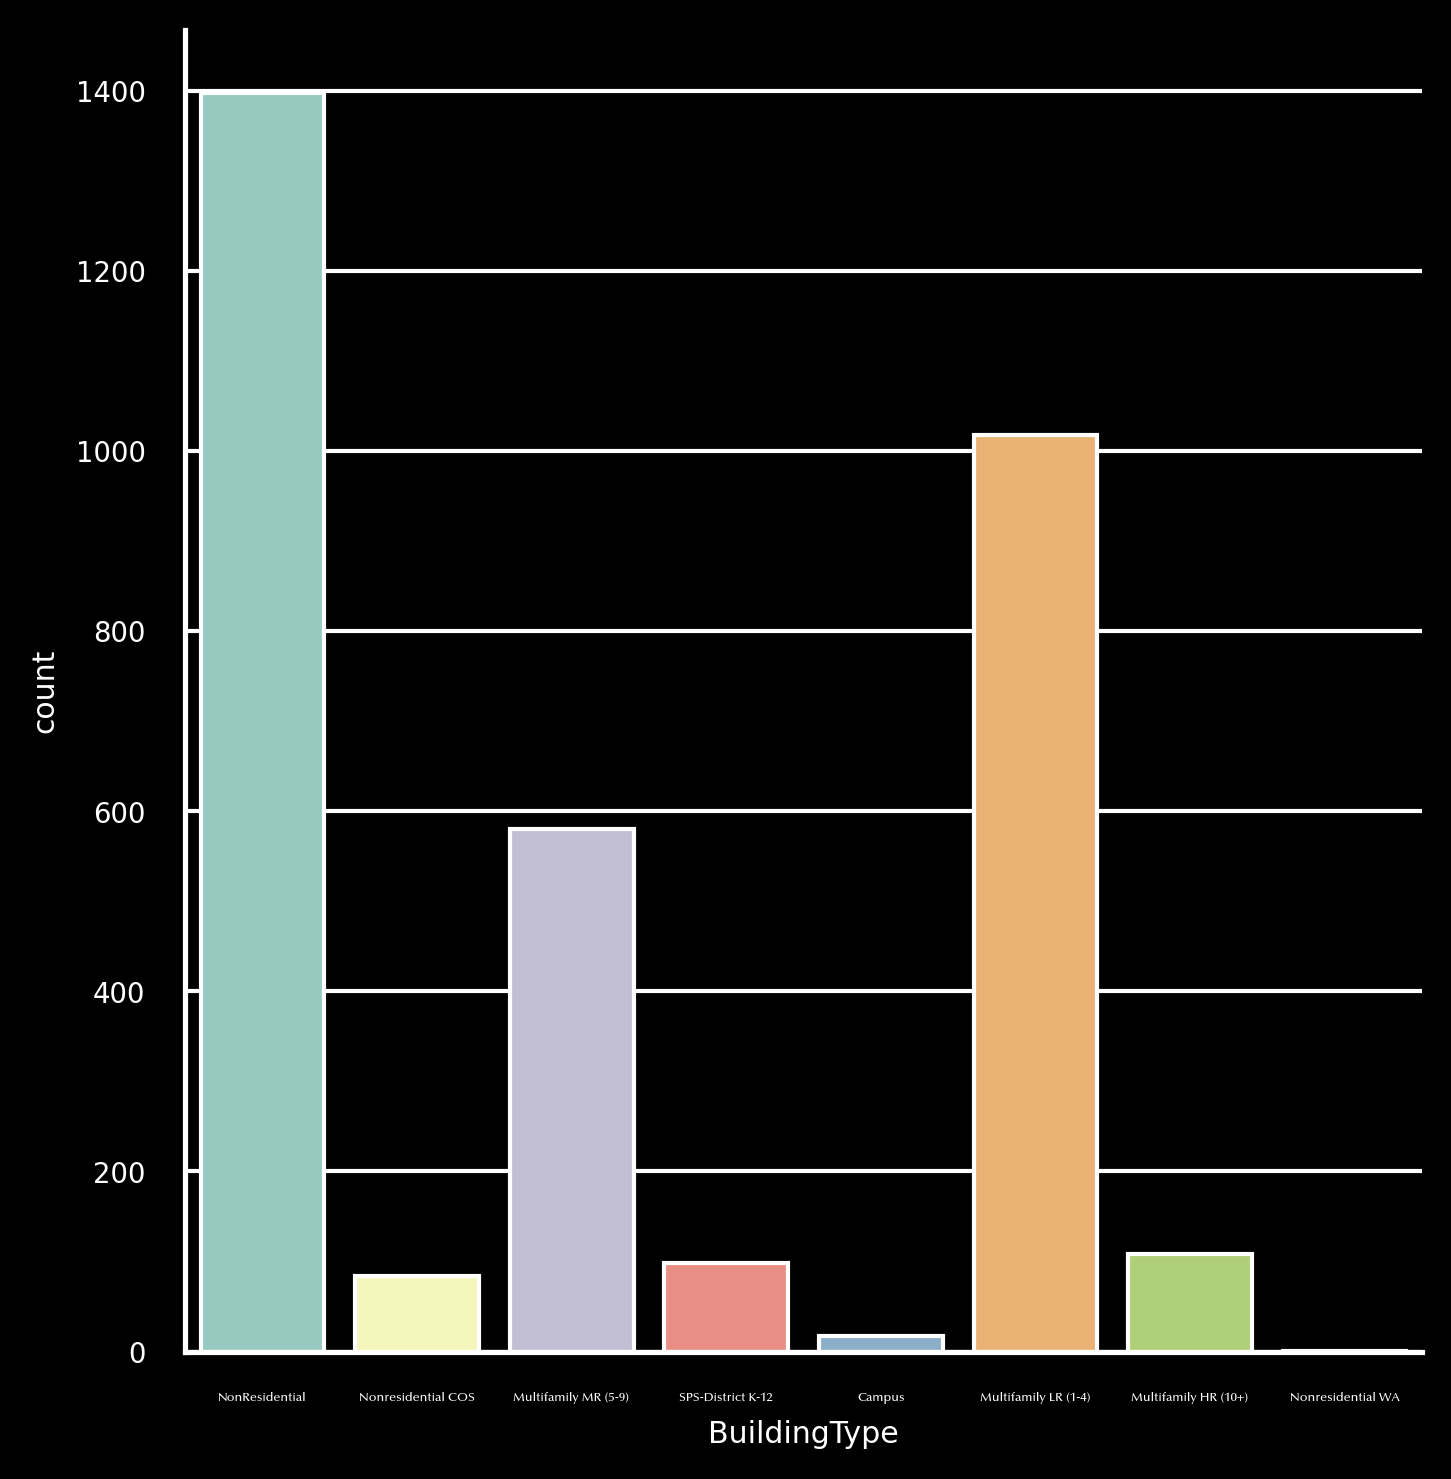

In [69]:
# création du camembert avec seaborn
sns.catplot(x='BuildingType', data=df_clean, kind='count')
plt.xticks(fontsize=3, fontproperties=prop)
# affichage du graphique
plt.show()

<font size="5">4. Analyse en Composantes Principales</font>

In [70]:
df_pca = df_clean[["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions",'Electricity(kBtu)', 'NaturalGas(kBtu)']]

In [72]:
X = df_pca.values
names = df_pca.index
features = df_pca.columns

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 12

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=12)

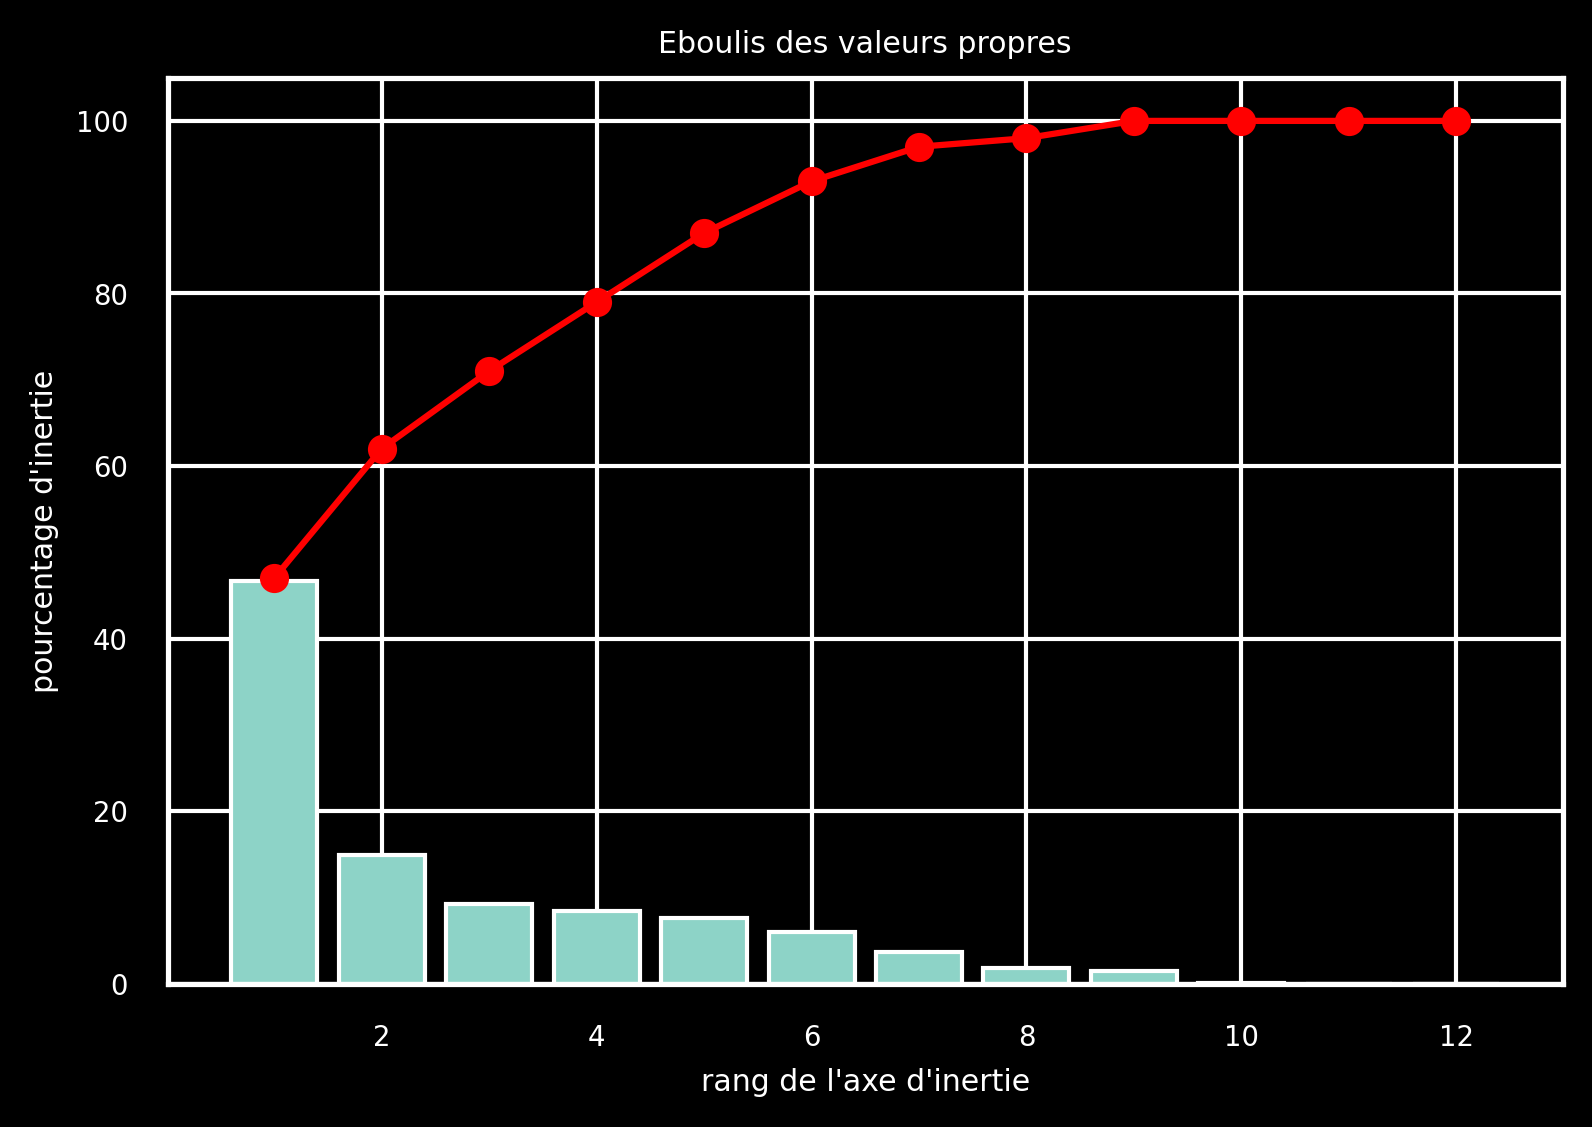

In [73]:
pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree

# on arrondit à la somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

x_list = range(1, n_components+1)
list(x_list)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

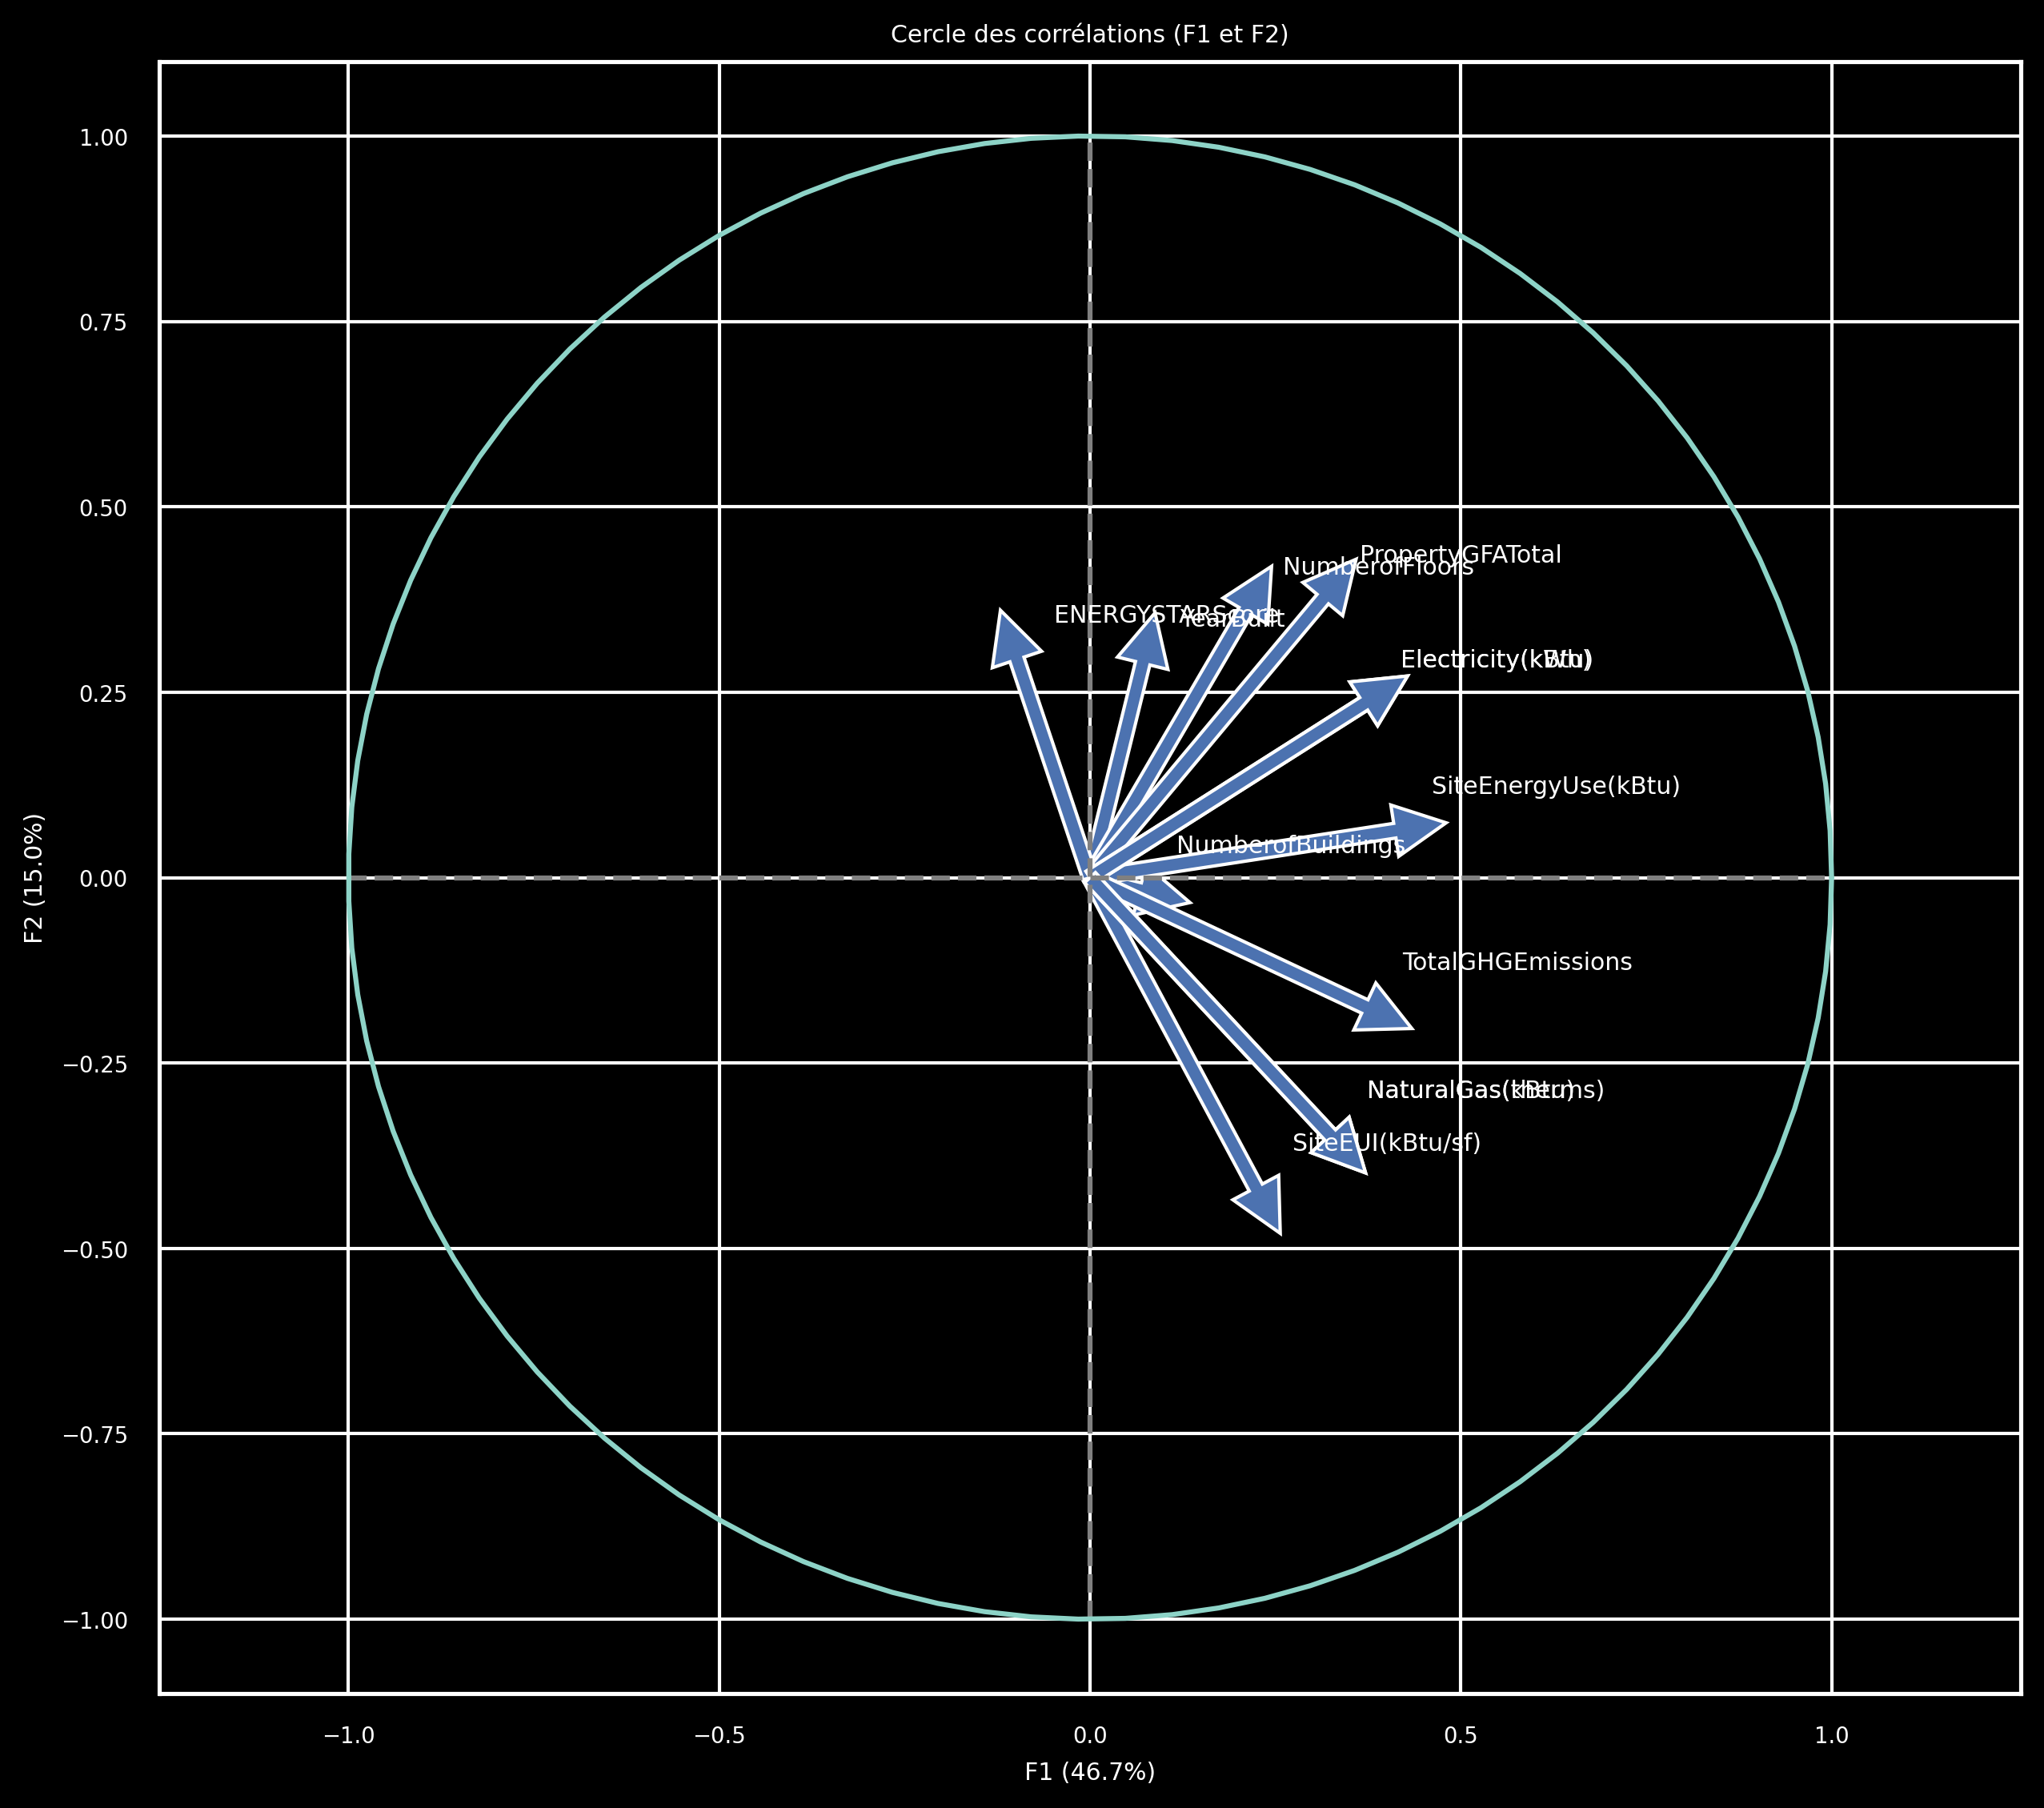

In [74]:
x,y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)